In [23]:
import pandas as pd
import glob
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [24]:

import pandas as pd

file_path = r"C:\project 3\final.xlsx"
df = pd.read_excel(file_path)


In [8]:
df.head()

,model,Wheel Base,Width,state,Max Power,RTO,Registration Year,Kms Driven,centralVariantId,price
0,Maruti Celerio,2425,1635,bangalore,67.04bhp@6000rpm,KA51,2015,120000,3979,400000
1,Ford Ecosport,2519,1765,bangalore,121.31bhp@6500rpm,KA05,2018,32706,6087,811000
2,Tata Tiago,2400,1647,bangalore,84bhp@6000rpm,KA03,2018,11949,2983,585000
3,Hyundai Xcent,2425,1660,bangalore,81.86bhp@6000rpm,KA53,2014,17794,1867,462000
4,Maruti SX4 S Cross,2600,1785,bangalore,88.5bhp@4000rpm,KA04,2015,60000,4277,790000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6381 entries, 0 to 6380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         6381 non-null   int64 
 1   model              6381 non-null   object
 2   Wheel Base         6381 non-null   int64 
 3   Width              6381 non-null   int64 
 4   state              6381 non-null   object
 5   Max Power          6381 non-null   object
 6   RTO                6381 non-null   object
 7   Registration Year  6381 non-null   int64 
 8   Kms Driven         6381 non-null   int64 
 9   centralVariantId   6381 non-null   int64 
 10  price              6381 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 548.5+ KB


In [36]:
df['price'] = df['price'].astype('float64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6381 entries, 0 to 6380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6381 non-null   int64  
 1   model              6381 non-null   int64  
 2   Wheel Base         6381 non-null   int64  
 3   Width              6381 non-null   int64  
 4   state              6381 non-null   int64  
 5   Max Power          6381 non-null   int64  
 6   RTO                6381 non-null   int64  
 7   Registration Year  6381 non-null   int64  
 8   Kms Driven         6381 non-null   int64  
 9   centralVariantId   6381 non-null   int64  
 10  price              6381 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 548.5 KB


In [38]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder
df_filtered = df.copy()
for column, encoder in label_encoders.items():
    df_filtered[column] = encoder.inverse_transform(df_filtered[column])  
    with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [10]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

C:\Users\reach\AppData\Local\Temp\ipykernel_24180\3854546557.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


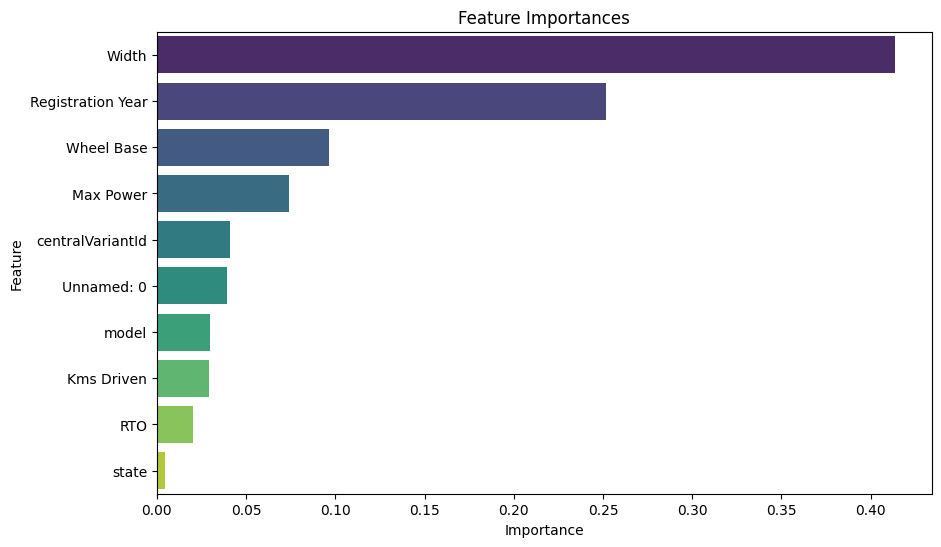

In [41]:
X = df.drop(columns=["price"])
y= df["price"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42,shuffle=True)

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred_y=model.predict(x_test)
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(11)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [42]:
print(model.feature_importances_)

[0.03940813 0.02987821 0.09621932 0.41362952 0.00474953 0.0739005
 0.02027503 0.25184052 0.02909721 0.04100203]


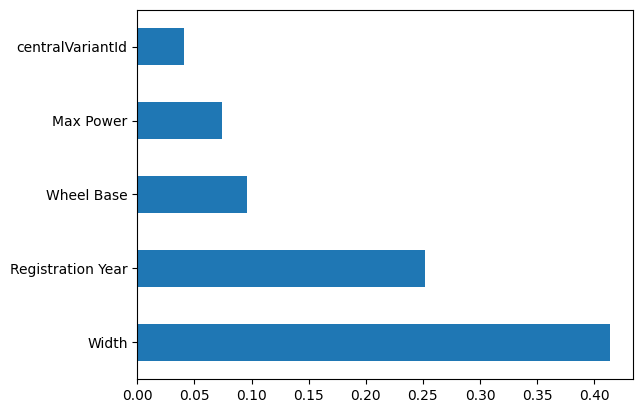

In [43]:
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
feature_imp.nlargest(5).plot(kind = 'barh')
plt.show()

In [ ]:

df.drop(columns=["Year of Manufacture",	"modelYear"],inplace=True)  
df_filtered.drop(columns=["Year of Manufacture","modelYear"],inplace=True) 
                                        

In [26]:
df.head(4)

,model,Wheel Base,Width,state,Max Power,RTO,Registration Year,Kms Driven,centralVariantId,price
0,Maruti Celerio,2425,1635,bangalore,67.04bhp@6000rpm,KA51,2015,120000,3979,400000
1,Ford Ecosport,2519,1765,bangalore,121.31bhp@6500rpm,KA05,2018,32706,6087,811000
2,Tata Tiago,2400,1647,bangalore,84bhp@6000rpm,KA03,2018,11949,2983,585000
3,Hyundai Xcent,2425,1660,bangalore,81.86bhp@6000rpm,KA53,2014,17794,1867,462000


In [28]:
df.describe()

,model,Wheel Base,Width,state,Max Power,RTO,Registration Year,Kms Driven,centralVariantId,price
count,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6.381000e+03
mean,87.708353,2520.675129,1717.945150,2.425325,272.182260,211.161730,2016.719793,58826.568406,4899.712741,6.380595e+05
std,46.777818,102.430361,68.247846,1.712926,134.688601,106.468528,3.384248,32414.056524,2734.544067,3.129963e+05
min,0.000000,2258.000000,1550.000000,0.000000,0.000000,0.000000,2008.000000,600.000000,13.000000,5.500000e+04
25%,48.000000,2435.000000,1680.000000,1.000000,122.000000,101.000000,2014.000000,33000.000000,1932.000000,4.170000e+05
50%,87.000000,2519.000000,1729.000000,2.000000,327.000000,219.000000,2017.000000,55940.000000,5431.000000,5.900000e+05
75%,114.000000,2590.000000,1760.000000,4.000000,375.000000,327.000000,2019.000000,80000.000000,7091.000000,8.000000e+05
max,190.000000,2874.000000,1918.000000,5.000000,462.000000,383.000000,2023.000000,154931.000000,11098.000000,1.600000e+06


outlier detection

In [29]:
####outlier detection
def outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    whisker1 = q1 - 1.5 * IQR
    whisker2 = q3 + 1.5 * IQR
    return whisker1, whisker2

for column in df.select_dtypes(include=['number']).columns:
    whisker1, whisker2 = outlier(df, column)
    df = df[(df[column] >= whisker1) & (df[column] <= whisker2)]

In [31]:
df.describe()

,model,Wheel Base,Width,state,Max Power,RTO,Registration Year,Kms Driven,centralVariantId,price
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5.875000e+03
mean,87.968511,2512.292426,1712.171745,2.408000,280.777532,211.245787,2016.750979,58637.875574,4892.086979,6.062555e+05
std,47.136205,94.502370,59.259368,1.709844,135.315269,105.958213,3.295530,32076.646983,2734.912290,2.631348e+05
min,0.000000,2258.000000,1560.000000,0.000000,1.000000,0.000000,2009.000000,600.000000,13.000000,7.500000e+04
25%,50.000000,2435.000000,1680.000000,1.000000,122.000000,101.000000,2015.000000,33200.000000,1897.000000,4.170000e+05
50%,89.000000,2500.000000,1709.000000,2.000000,332.000000,219.000000,2017.000000,55609.000000,5455.000000,5.750000e+05
75%,115.000000,2570.000000,1745.000000,4.000000,382.500000,315.000000,2019.000000,80000.000000,7081.000000,7.650000e+05
max,189.000000,2810.000000,1880.000000,5.000000,462.000000,383.000000,2023.000000,150729.000000,11098.000000,1.359000e+06


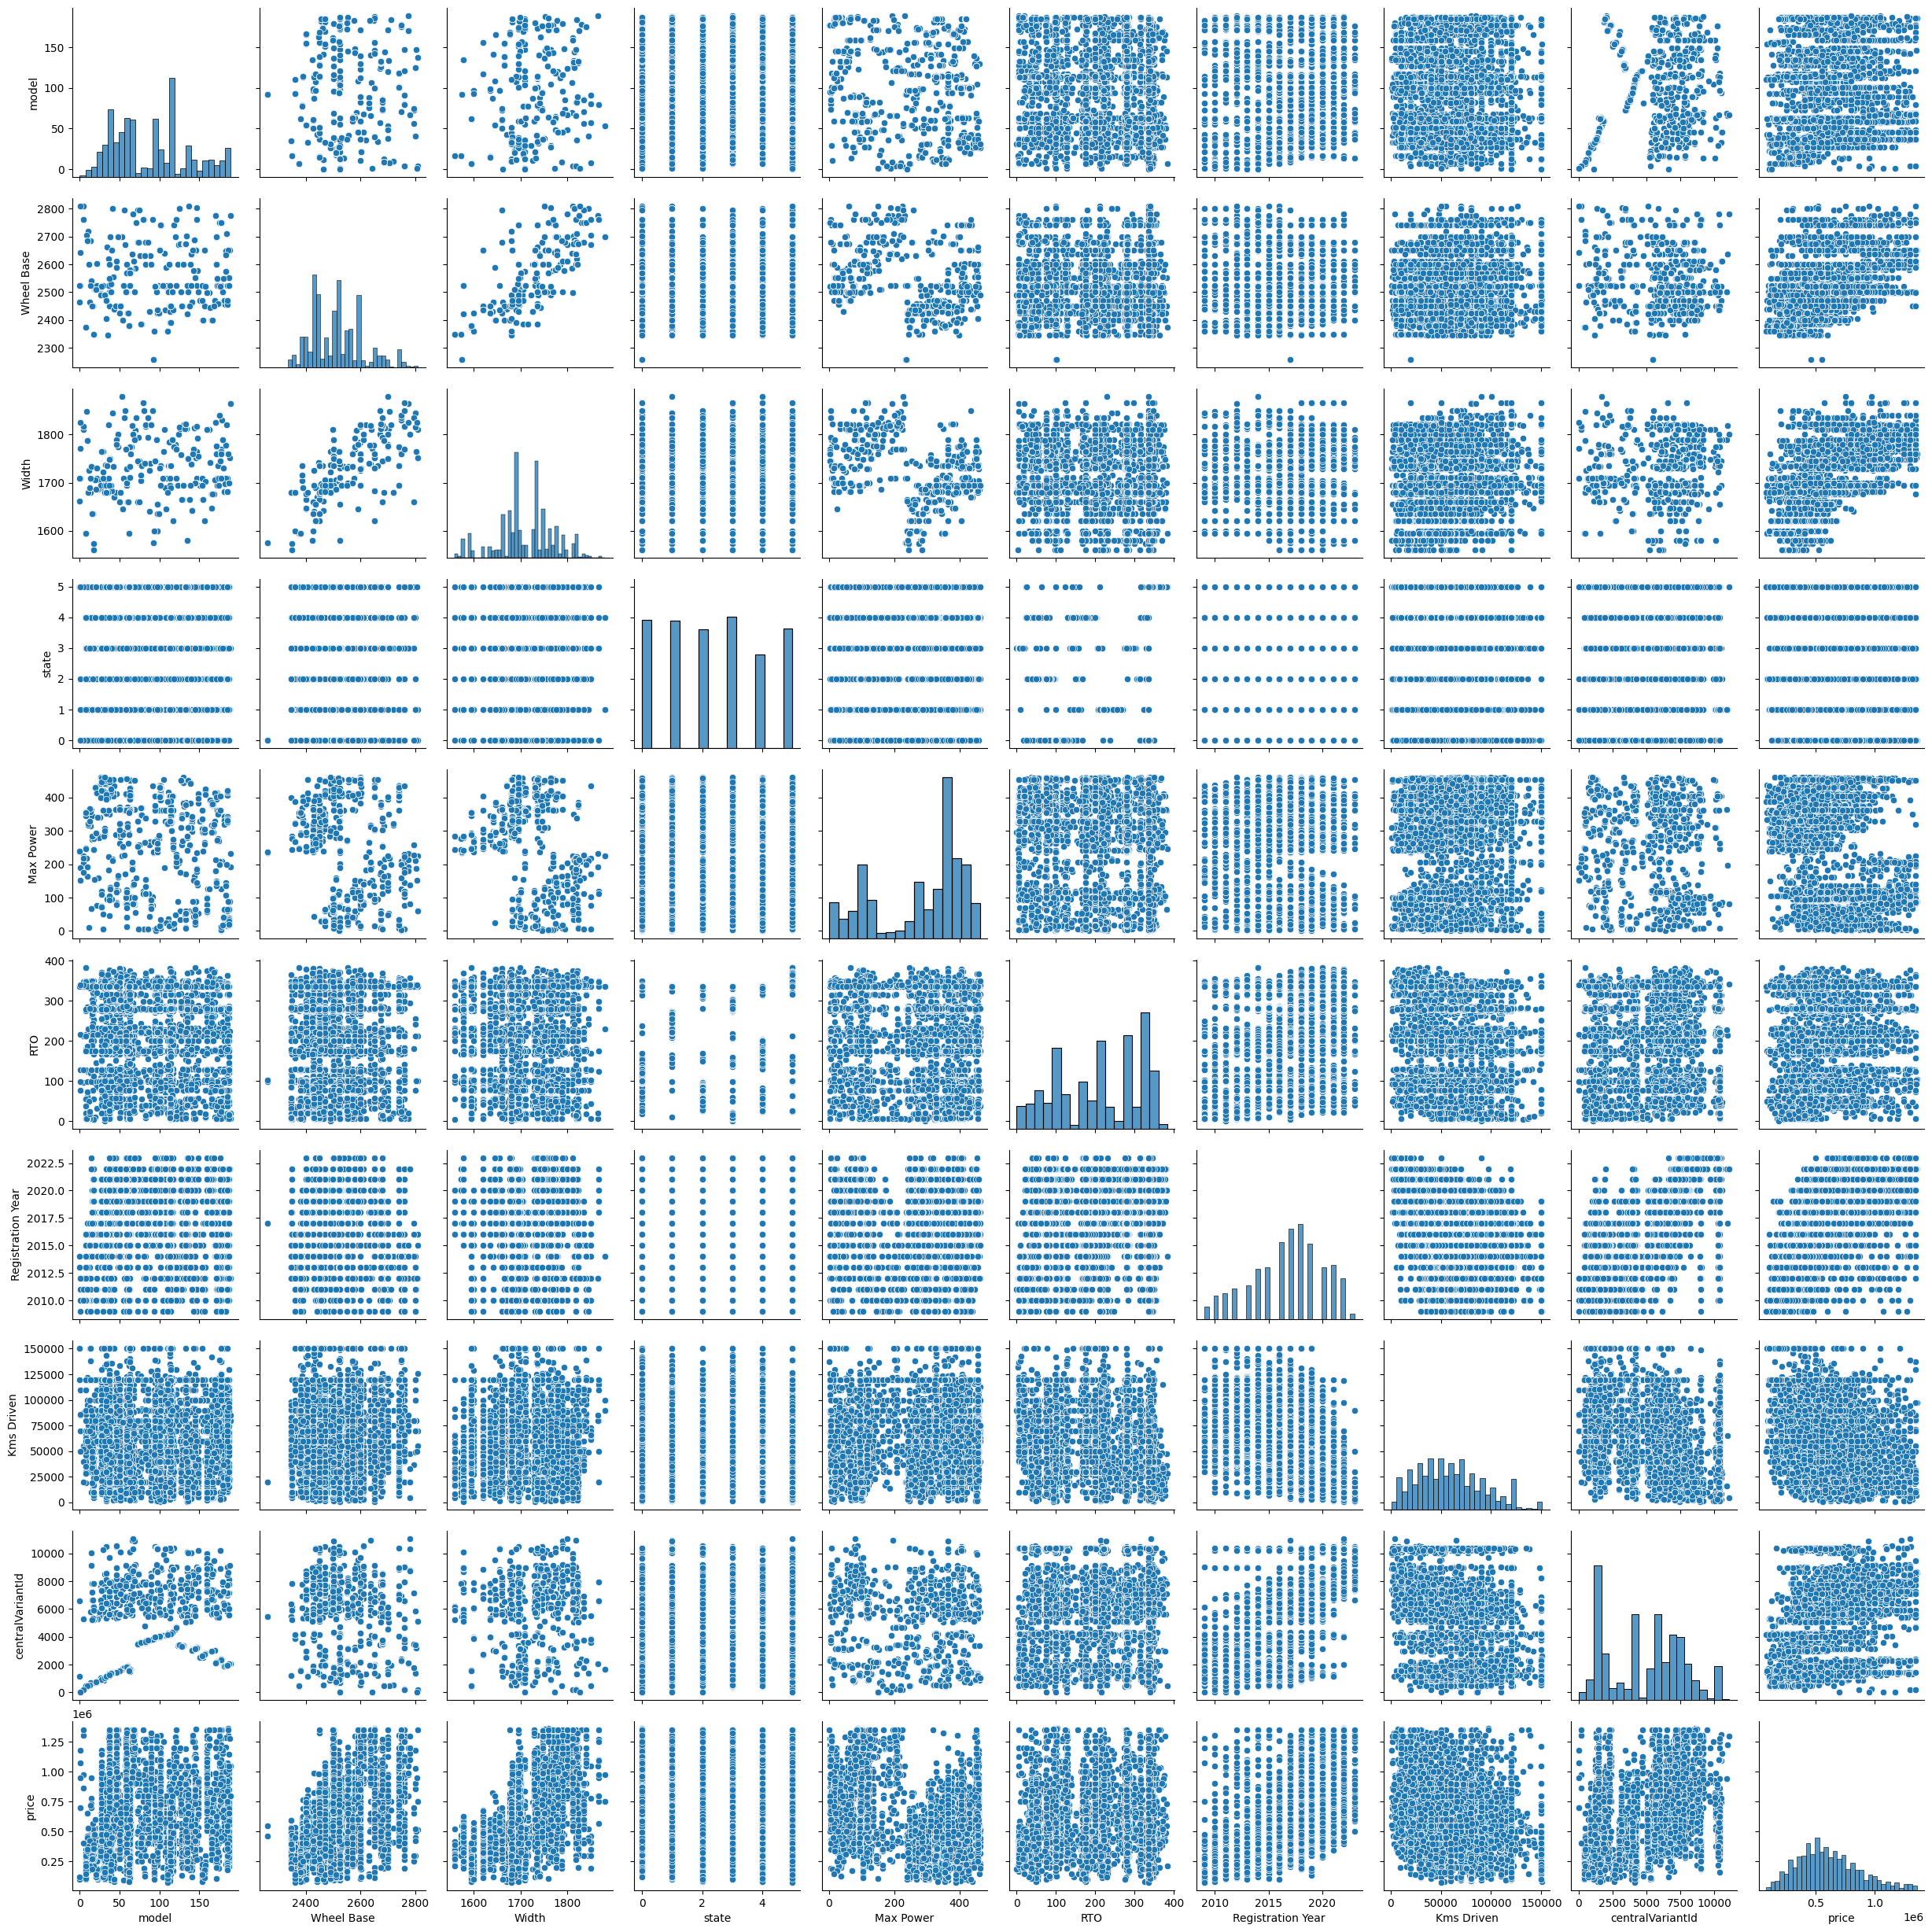

In [32]:
sns.pairplot(df)

<Axes: title={'center': 'Correlation Matrix Heatmap'}>

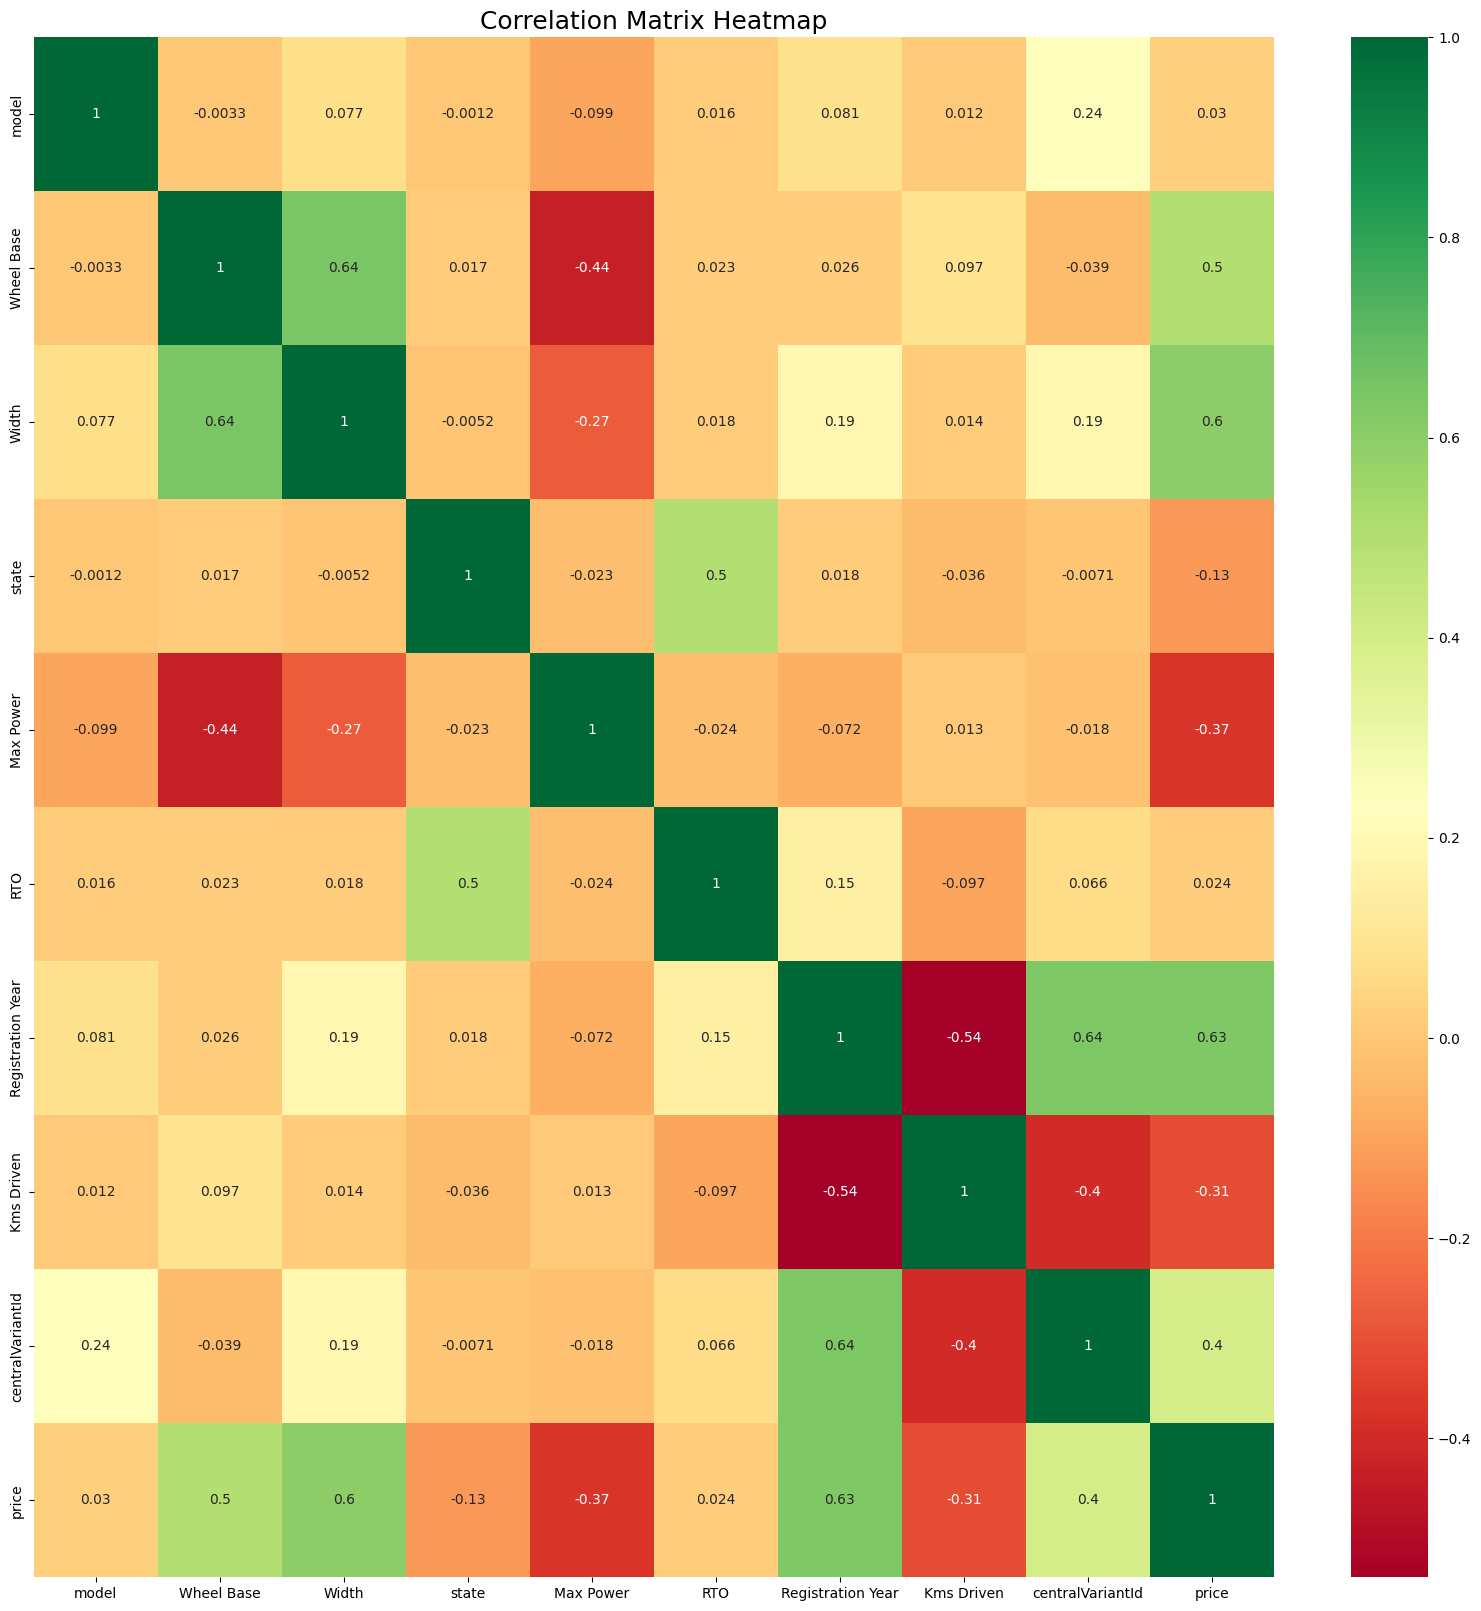

In [34]:
plt.figure(figsize=(20,20))
corrmat = df.corr()
top_features = corrmat.index
plt.title('Correlation Matrix Heatmap', fontsize=18)
sns.heatmap(df[top_features].corr(), annot=True, cmap='RdYlGn')

LINEAR REGRESSION METHOD

In [35]:

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42,shuffle=True)
model = LinearRegression()
model.fit(x_train,y_train)
pred_y=model.predict(x_test)
mse = mean_squared_error(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 19118887446.772167
Mean Absolute Error: 100220.60047817879
R-squared: 0.7270644185309659


DESICION TREE

In [44]:
model = DecisionTreeRegressor(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 17814687565.97447
Mean Absolute Error: 91493.1914893617
R-squared: 0.7456827902227487


RANDOM FOREST

In [46]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred_y=model.predict(x_test)
mse = mean_squared_error(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 8208767882.770562
Mean Absolute Error: 63849.39169402229
R-squared: 0.8828140580111752


C:\Users\reach\AppData\Local\Temp\ipykernel_19380\1247179875.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred_y)


<Axes: xlabel='price', ylabel='Density'>

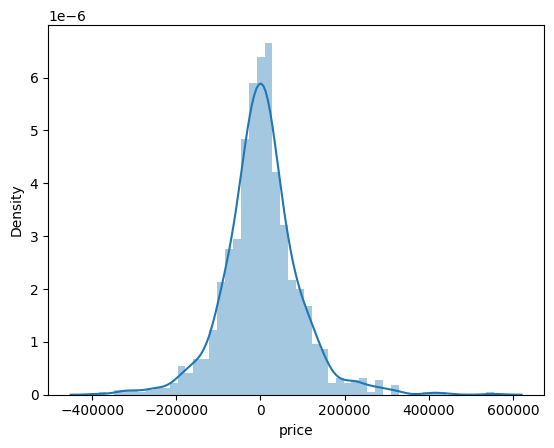

In [50]:
sns.distplot(y_test - pred_y)

In [ ]:
GRID SERACH ##HYPER PARAMETER TUNING

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean Squared Error: 8114235661.451443
Mean Absolute Error: 63703.266453495446
R-squared: 0.8841635720383446


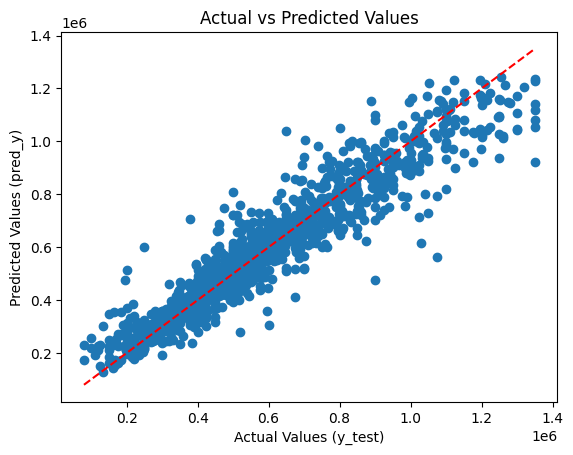

In [55]:
rf = RandomForestRegressor(random_state=42)

# Step 2: Set up the parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
)

grid_search.fit(x_train, y_train)

pred_y=grid_search.predict(x_test)

mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)
r2 = r2_score(y_test, pred_y)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
import matplotlib.pyplot as plt

# Assuming y_test and pred_y are defined
plt.scatter(y_test, pred_y)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (pred_y)')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Optional: add a reference line y=x
plt.show()


GRADIENT BOOSTING REGRESSOR

In [47]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 9533164190.979677
Mean Absolute Error: 70419.72848980097
R-squared: 0.8639073680961443


In [48]:
model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.2],
    'max_depth': [5],
    'min_samples_split': [4],
    'min_samples_leaf': [2],
    'subsample': [0.8]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model with the grid search
grid_search.fit(x_train, y_train)


# Predict using the model with the best-found parameters
y_pred = grid_search.best_estimator_.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean Squared Error: 6499471574.611793
Mean Absolute Error: 58597.09633596759
R-squared: 0.907215466464937


In [ ]:
file = open('trained model.pkl', 'wb')

# dump information on that file
pickle.dump(model, file)